Importation des modules

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import tree

Chargement des datas et des features depuis l'excel

In [14]:
df = pd.read_excel (r'patient_data.xlsx', sheet_name='Sheet6')
raw_datas = df.values.tolist()
print("forme de chaque data : ",raw_datas[0])

features_list = list(df.to_dict().keys())[:-3] #avec -3 on exclue les résultats
features_res_list = list(df.to_dict().keys())[-3:] 
print("features : ", features_list)
print("features du resultat : ", features_res_list)

def analyseRes(y_predic):
    y_new = []
    for i in range(len(y_predict)):
        if (y_predict[i]>=0.5):
            y_new.append(1)
        else :
            y_new.append(0)
    return y_new


forme de chaque data :  ['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N']
features :  ['Fasting Blood Sugar>1,26g/L (2 different times)', 'associated symptoms (thirsty/poliuria)', 'weightloss', 'Blood sugar >2g/L', 'tired', 'blurred vision']
features du resultat :  ['It is recommended to have a fasting blood sugar level control urgently ', ' It is highly recommended to have a medical advise in max 10 days', 'It is recommended to have an A1c blood test']


Mise en forme des listes X (données entrantes patients) et y (résultats en sortie)

In [17]:
X=[]
y=[]
y_element1= []
y_element2= []
y_element3= []
for j in range(len(raw_datas)):
    X_element = []
   
    for i in range(len(raw_datas[0])):
        
        if (i<=len(raw_datas[0])-4):
            ##on est dans les features
            if (raw_datas[j][i]=='Y') :
            
                X_element.append(1)
            else :
                X_element.append(0)
        elif (i==len(raw_datas[0])-3) :
            if (raw_datas[j][i]=='Y') :
            
                y_element1.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element1.append(0)
        elif (i==len(raw_datas[0])-2) :
            if (raw_datas[j][i]=='Y') :

                y_element2.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element2.append(0)
        elif (i==len(raw_datas[0])-1) :
            if (raw_datas[j][i]=='Y') :

                y_element3.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element3.append(0)
    
    X.append(X_element)  

y.append(y_element1)
y.append(y_element2)
y.append(y_element3)
#print(X[0], X[1],y[0],y[1])     
print(y)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]]


Test de prediction sur du binaire pour la première colonne de résultat

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y prédit : " , y_pred ,", y de réf : ", y_test)

#test de prediction sur un X quelconque
y_predict = clf.predict([[0, 0, 0, 0, 0, 0]])
#print(y_predict)

y prédit :  [1 0 0 0 0 0] , y de réf :  [1, 0, 0, 0, 0, 0]


Test de prédiction sur la 1ère colonne avec MLP (non binaire)

[ 0.6574513  -0.02344226  0.03679511 -0.04973003  0.01779899  0.09407965] [1, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'It is recommended to have a fasting blood sugar level control urgently')

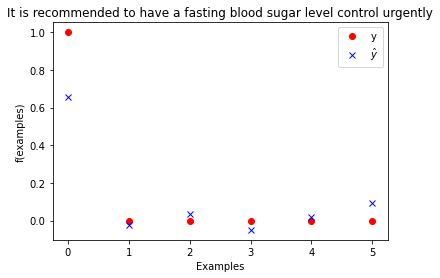

In [19]:
# Marche pas très bien pour des résultats binaires

X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)
print(y_predict,y_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')

plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a fasting blood sugar level control urgently")

Test de prédiction sur la 2ème colonne avec MLP

y test :  [0, 1, 0, 1, 1, 1] ,y pred :  [0, 1, 0, 1, 1, 1] [0.19070212 0.95631741 0.09824801 0.96337658 1.06225277 0.93140514]


Text(0.5, 1.0, ' It is highly recommended to have a medical advise in max 10 days')

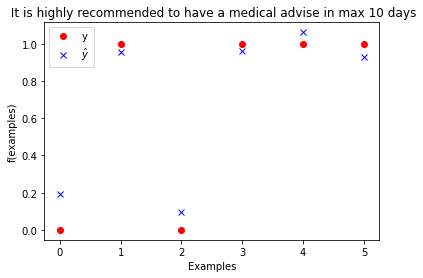

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y[1],random_state=1, test_size = 0.20)
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title (" It is highly recommended to have a medical advise in max 10 days")

y test :  [0, 1, 0, 1, 1, 1] ,y pred :  [0, 1, 0, 1, 1, 1] [0.07130444 0.946664   0.0834237  1.02099991 1.04843143 0.97460909]


Text(0.5, 1.0, 'It is recommended to have an A1c blood test')

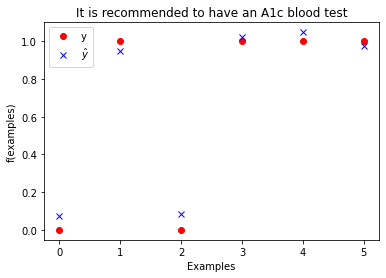

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y[2],random_state=1, test_size = 0.20)
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have an A1c blood test")

In [22]:
##test d'une prédiction sur un nouveau X
y_predict = mlp.predict([[0, 0, 1, 0, 1, 1]])
print(analyseRes(y_predict))

[0]


In [23]:
df = pd.read_excel (r'patient_data.xlsx', sheet_name='Sheet1')
raw_datas = df.values.tolist()
print(raw_datas[0],raw_datas[1])

features_list = list(df.to_dict().keys())[:-5] 
features_res_list = list(df.to_dict().keys())[-5:] 
print("features : \n", features_list)
print("features res: \n", features_res_list)

['M', 56, 'Fr', 'white', 'urban>1 milion', 'plane', 'professional school', 5, 'no', 'N', 'N', 'N', 'Y', 'N'] ['M', 47, 'Fr', 'white', '<100 000', 'hills', 'high school', 7, 'no', 'N', 'N', 'N', 'N', 'N']
features : 
 ['sex', 'age', 'country of birth', 'race', 'place of living (aggomeration) ', 'geographie of living place', 'profession (studies)', 'Berg scale (profession)', 'recent change of professional field']
features res: 
 ['It is recommended to have a screening test for cervical (uterin) cancer every 3 years with cervical cytology test ', 'It is recommended to have a screening test every 3 years wit cervical cytology test alone', 'it is recommended to have a screening test every 5 years with high-risk human papilloma virus (PV) test alone', 'It is recommended to have a screening stool test every 2 years: the high senzitivity guaiac fecal occult blood test (gFOBT) or fecal immunochemical test (FIT)', 'It is recommended to have a mammography every 2 years']


In [24]:
X=[]
y=[]
y_element1 = []
y_element2 = []
y_element3 = []
y_element4 = []
y_element5 = []

poss_list = {}
cnt_list = [0]*len(raw_datas[0])

for j in range(len(raw_datas)):
    X_element = []
    
    for i in range(len(raw_datas[0])):
           
        if (i<=len(raw_datas[0])-6):
            ##on est dans les features
            if (raw_datas[j][i] in poss_list.keys()) :
                X_element.append(poss_list.get(raw_datas[j][i]))
            else :
                
                poss_list[raw_datas[j][i]]=cnt_list[i]
                X_element.append(cnt_list[i])
                cnt_list[i]+=1
                
        elif (i==len(raw_datas[0])-1) :
            if (raw_datas[j][i]=='Y') :
            
                y_element5.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element5.append(0)
        elif (i==len(raw_datas[0])-2) :
            if (raw_datas[j][i]=='Y') :
            
                y_element4.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element4.append(0)
        elif (i==len(raw_datas[0])-3) :
            if (raw_datas[j][i]=='Y') :
            
                y_element3.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element3.append(0)
        elif (i==len(raw_datas[0])-4) :
            if (raw_datas[j][i]=='Y') :
            
                y_element2.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element2.append(0)
        elif (i==len(raw_datas[0])-5) :
            if (raw_datas[j][i]=='Y') :
            
                y_element1.append(1)
            else :
                ##par défaut si on a pas de réponse je met 0 comme pour 'N'
                y_element1.append(0)
        
    
    X.append(X_element)   

y.append(y_element1)  
y.append(y_element2)
y.append(y_element3)
y.append(y_element4)
y.append(y_element5)
#print(X,y)

print(y)

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


y test :  [0, 0, 0, 0, 0, 1] ,y pred :  [0, 0, 0, 0, 1, 1] [-0.05903567  0.16834917 -0.31702818 -0.02731334  0.91982975  0.58050747]


Text(0.5, 1.0, 'It is recommended to have a screening test for cervical (uterin) cancer every 3 years with cervical cytology test ')

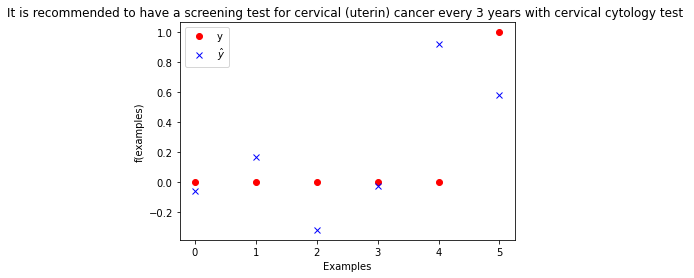

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y[0],random_state=1, test_size = 0.20)

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a screening test for cervical (uterin) cancer every 3 years with cervical cytology test ")



y test :  [0, 1, 1, 1, 1, 0] ,y pred :  [0, 1, 1, 1, 1, 0] [-0.05197046  0.86149717  0.97674871  1.09625245  0.97048909  0.24869213]


Text(0.5, 1.0, 'It is recommended to have a screening test every 3 years wit cervical cytology test alone')

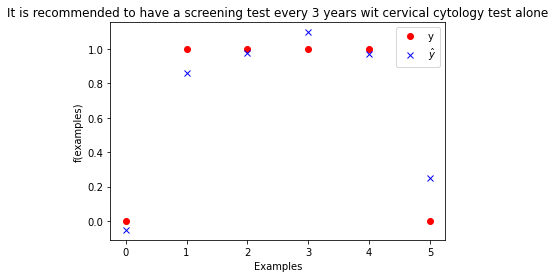

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y[1],random_state=1, test_size = 0.20)

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a screening test every 3 years wit cervical cytology test alone")

y test :  [0, 1, 1, 1, 1, 0] ,y pred :  [0, 1, 1, 1, 1, 0] [-0.0109414   0.8262221   0.99031655  1.07832032  0.90932431  0.40008537]


Text(0.5, 1.0, 'it is recommended to have a screening test every 5 years with high-risk human papilloma virus (PV) test alone')

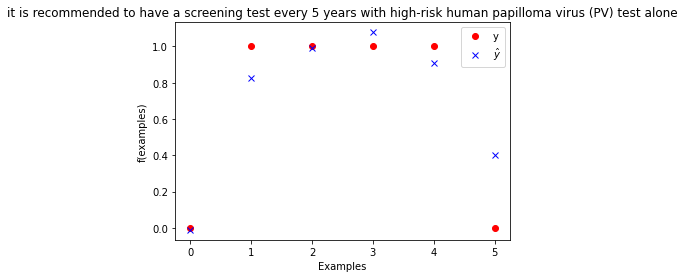

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y[2],random_state=1, test_size = 0.20)

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("it is recommended to have a screening test every 5 years with high-risk human papilloma virus (PV) test alone")

y test :  [1, 0, 0, 0, 0, 0] ,y pred :  [1, 0, 0, 0, 0, 0] [ 0.87759583 -0.03352246  0.00598718  0.21211072  0.00624578  0.05761163]


Text(0.5, 1.0, 'It is recommended to have a screening stool test every 2 years: the high senzitivity guaiac fecal occult blood test (gFOBT) or fecal immunochemical test (FIT)')

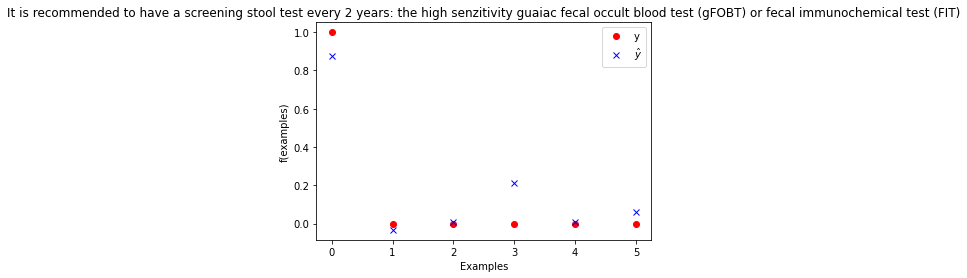

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y[3],random_state=1, test_size = 0.20)

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a screening stool test every 2 years: the high senzitivity guaiac fecal occult blood test (gFOBT) or fecal immunochemical test (FIT)")

y test :  [0, 0, 0, 0, 0, 0] ,y pred :  [0, 0, 0, 0, 0, 0] [ 0.10695269 -0.20672847  0.17068632  0.28931109  0.07179309 -0.10875633]


Text(0.5, 1.0, 'It is recommended to have a mammography every 2 years')

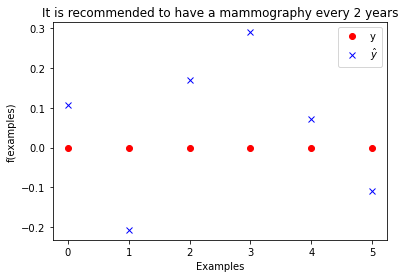

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y[4],random_state=1, test_size = 0.20)

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_predict = mlp.predict(X_test)

# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
plt.plot(y_predict[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
print("y test : ",y_test, ",y pred : ", analyseRes(y_predict), y_predict)
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.title ("It is recommended to have a mammography every 2 years")